In [101]:
import numpy as np
import pandas as pd

# Revisando...

## LC | Pandas 2

### Questão 01

O arquivo `avocado.csv` consiste em um dataset que contém dados sobre vendas de abacates (*avocado*, em inglês) em diversas regiões dos Estados Unidos. Essa dataset contém as seguintes colunas:

- `Date` - a data da observação
- `AveragePrice` - o preço médio de um único abacate
- `year` - o ano
- `region` - a cidade ou região da observação
- `Total Volume` - volume total de abacates vendidos

Além das informações acima, contidas no arquivo `avocado.csv`, o tipo do abacate (convencional ou orgânico) também seria uma informação importante para a sua análise. Suponhamos que você conseguiu essas informações para cada uma das observações do arquivo `avocado.csv`, na mesma ordem, e salvou-as no arquivo [`avocado_type.csv`](https://s3-sa-east-1.amazonaws.com/lcpi/8529cc1b-7fd3-40f1-994d-fc11f32fdf5d.csv). **Portanto, tudo o que você precisa é juntar esses dois arquivos em um mesmo DataFrame. E, em seguida, salve-o em um arquivo csv.**

PS. Caso queira criar uma Series com os dados aleatórios para o tipo de abacate, utilize o código abaixo:

```py
tipos = pd.Series(np.random.randint(0, 2, df_avocado.shape[0]))
tipos = tipos.map({0: 'convencional', 1:'orgânico'})
```

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/45e500a1-4a2b-4cfe-8b6c-1ff831d74d87.csv) para fazer o download do dataset.

In [26]:
avocado = pd.read_csv('../datasets/avocado.csv')
avocado_type = pd.read_csv('../datasets/avocado_type.csv')

In [27]:
avocado.head()

,Date,AveragePrice,Total Volume,year,region
0,2015-12-27,1.33,64236.62,2015,Albany
1,2015-12-20,1.35,54876.98,2015,Albany
2,2015-12-13,0.93,118220.22,2015,Albany
3,2015-12-06,1.08,78992.15,2015,Albany
4,2015-11-29,1.28,51039.60,2015,Albany


In [28]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [29]:
avocado_type.head()

,type
0,conventional
1,conventional
2,conventional
3,conventional
4,conventional


In [30]:
avocado_type['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [31]:
pd.concat([avocado, avocado_type], axis=1)

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional
2,2015-12-13,0.93,118220.22,2015,Albany,conventional
3,2015-12-06,1.08,78992.15,2015,Albany,conventional
4,2015-11-29,1.28,51039.60,2015,Albany,conventional
...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2018,WestTexNewMexico,organic
18245,2018-01-28,1.71,13888.04,2018,WestTexNewMexico,organic
18246,2018-01-21,1.87,13766.76,2018,WestTexNewMexico,organic
18247,2018-01-14,1.93,16205.22,2018,WestTexNewMexico,organic


In [37]:
pd.merge(avocado, avocado_type, how='inner', left_index=True, right_index=True)

,Date,AveragePrice,Total Volume,year,region,type
0,2015-12-27,1.33,64236.62,2015,Albany,conventional
1,2015-12-20,1.35,54876.98,2015,Albany,conventional
2,2015-12-13,0.93,118220.22,2015,Albany,conventional
3,2015-12-06,1.08,78992.15,2015,Albany,conventional
4,2015-11-29,1.28,51039.60,2015,Albany,conventional
...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2018,WestTexNewMexico,organic
18245,2018-01-28,1.71,13888.04,2018,WestTexNewMexico,organic
18246,2018-01-21,1.87,13766.76,2018,WestTexNewMexico,organic
18247,2018-01-14,1.93,16205.22,2018,WestTexNewMexico,organic


In [33]:
(avocado_type.index == avocado.index)

array([ True,  True,  True, ...,  True,  True,  True])

In [34]:
avocado.shape

(18249, 5)

In [41]:
tipos = pd.Series(np.random.randint(0, 2, avocado.shape[0]), name='type')
tipos = tipos.map({0: 'convencional', 1:'orgânico'})

tipos.head()

0    convencional
1        orgânico
2    convencional
3    convencional
4        orgânico
Name: type, dtype: object

---

<img style="margin: 2rem 0 0;" src="https://matplotlib.org/3.2.1/_static/logo2_compressed.svg" width="200px" />

# Aula 07 - Aprofundando no Matplotlib
---

Assim como o NumPy e o Pandas, o [Matplotlib](http://matplotlib.org/) é uma das bibliotecas que fazem parte do núcleo do [SciPy](https://www.scipy.org/) para visualização de dados 2-D.

## Antes de tudo...

### Instalação

Se você tem o Anaconda instalado, você provavelmente já possui a biblioteca instalada.

Para checar se você já tem, no Jupyter Notebook ou interpretador do python, rode:

```python
import matplotlib
```

Se não der erro, é porque está tudo ok!

Caso você tenha um erro, será necessário instalar. Para isso, rode o comando no prompt/terminal que possua acesso ao comando:

```
pip install matplotlib
```

In [88]:
!pip install matplotlib

## 1. Parâmetros de Gráficos do Matplotlib
---

<img
     alt="Parâmetros do Matplotlib"
     src="https://matplotlib.org/3.1.0/_images/anatomy.png"
     style="width: 600px; border-radius: 10px"
 />

## 2. Plotagem Básica
---

- Gráficos Simples  
- Gráficos com múltiplas curvas  

In [42]:
# Importação
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

### 2.1. Plotagem com Listas

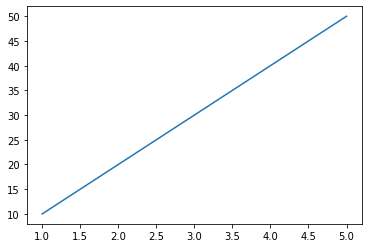

In [91]:
plt.plot([1, 2, 3, 4, 5], [10, 20, 30, 40, 50])

### 2.2. Plotagem com Arrays

In [92]:
a1 = np.array([1, 2, 3, 4, 5])
a2 = np.array([10, 20, 30, 40, 50])

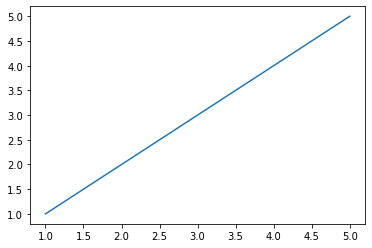

In [96]:
plt.plot(a1, [1, 2, 3, 4, 5])

In [105]:
x = np.arange(0, 2 * np.pi, 0.01)
y = np.sin(x)

In [106]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [107]:
y

array([ 0.        ,  0.00999983,  0.01999867,  0.0299955 ,  0.03998933,
        0.04997917,  0.05996401,  0.06994285,  0.07991469,  0.08987855,
        0.09983342,  0.1097783 ,  0.11971221,  0.12963414,  0.13954311,
        0.14943813,  0.15931821,  0.16918235,  0.17902957,  0.18885889,
        0.19866933,  0.2084599 ,  0.21822962,  0.22797752,  0.23770263,
        0.24740396,  0.25708055,  0.26673144,  0.27635565,  0.28595223,
        0.29552021,  0.30505864,  0.31456656,  0.32404303,  0.33348709,
        0.34289781,  0.35227423,  0.36161543,  0.37092047,  0.38018842,
        0.38941834,  0.39860933,  0.40776045,  0.4168708 ,  0.42593947,
        0.43496553,  0.44394811,  0.45288629,  0.46177918,  0.47062589,
        0.47942554,  0.48817725,  0.49688014,  0.50553334,  0.51413599,
        0.52268723,  0.5311862 ,  0.53963205,  0.54802394,  0.55636102,
        0.56464247,  0.57286746,  0.58103516,  0.58914476,  0.59719544,
        0.60518641,  0.61311685,  0.62098599,  0.62879302,  0.63

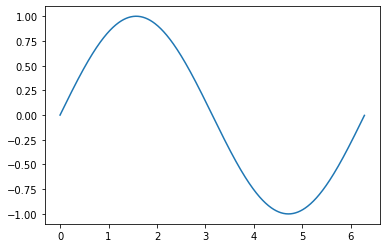

In [108]:
plt.plot(x, y)

### 2.3. Plotagem com DataFrames

Vamos utilizar o dataset [`life_expectancy.csv`](https://s3-sa-east-1.amazonaws.com/lcpi/87a076e6-c0f4-48dc-9c45-2e17c70c9ab3.csv).

In [43]:
df = pd.read_csv('../datasets/life_expectancy.csv')

In [44]:
df.head()

,Unnamed: 0,Year,Life Expectancy,Country
0,0,1950,49.56,Brazil
1,1,1951,49.98,Brazil
2,2,1952,50.41,Brazil
3,3,1953,50.83,Brazil
4,4,1954,51.25,Brazil


In [45]:
df.columns

Index(['Unnamed: 0', 'Year', 'Life Expectancy', 'Country'], dtype='object')

In [46]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [47]:
df.head()

,Year,Life Expectancy,Country
0,1950,49.56,Brazil
1,1951,49.98,Brazil
2,1952,50.41,Brazil
3,1953,50.83,Brazil
4,1954,51.25,Brazil


In [48]:
df['Country'].unique()

array(['Brazil', 'EUA'], dtype=object)

In [49]:
df_brazil = df[df['Country'] == 'Brazil']
df_usa = df[df['Country'] == 'EUA']

In [50]:
df_brazil

,Year,Life Expectancy,Country
0,1950,49.56,Brazil
1,1951,49.98,Brazil
2,1952,50.41,Brazil
3,1953,50.83,Brazil
4,1954,51.25,Brazil
5,1955,51.68,Brazil
6,1956,52.10,Brazil
7,1957,52.53,Brazil
8,1958,52.95,Brazil
9,1959,53.44,Brazil


In [119]:
df_usa

,Year,Life Expectancy,Country
11,1950,51.41,EUA
12,1951,54.77,EUA
13,1952,55.68,EUA
14,1953,57.49,EUA
15,1954,58.35,EUA
16,1955,59.08,EUA
17,1956,59.31,EUA
18,1957,59.35,EUA
19,1958,60.41,EUA
20,1959,60.88,EUA


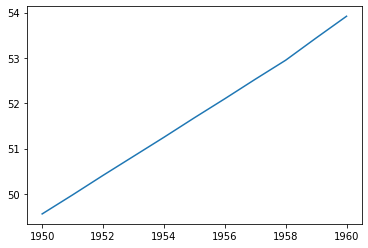

In [120]:
plt.plot(df_brazil['Year'], df_brazil['Life Expectancy'])

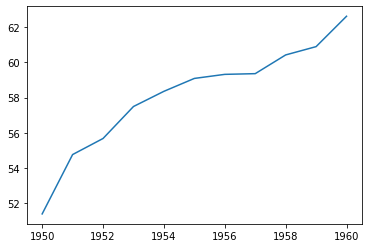

In [121]:
plt.plot(df_usa['Year'], df_usa['Life Expectancy'])

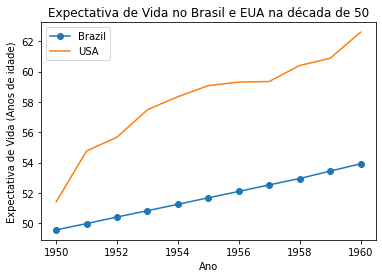

In [76]:
# axis == eixo
# axes == conjunto dos eixos

# Plotando as duas curvas em uma mesma figure e um mesmo axes (conjunto de dois axis)

plt.title('Expectativa de Vida no Brasil e EUA na década de 50')
plt.plot(df_brazil['Year'], df_brazil['Life Expectancy'], label='Brazil', marker='o')
plt.plot(df_usa['Year'], df_usa['Life Expectancy'], label='USA')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (Anos de idade)')
plt.legend()

### 2.4. Múltiplas Curvas

#### 2.4.1. Plotando duas curvas

$$
y_1 = \sin{(x)}
$$

$$
y_2 = \cos{(x)}
$$

In [55]:
x = np.arange(0, 3 * np.pi, 0.01)

y1 = np.sin(x)
y2 = np.cos(x)

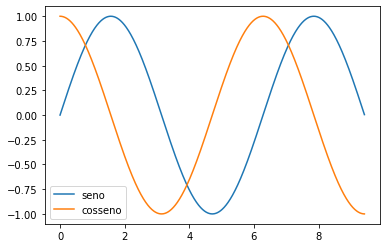

In [57]:
plt.plot(x, y1, label='seno')
plt.plot(x, y2, label='cosseno')
plt.legend()

#### 2.4.2. Plotando três curvas

$$
y_1 = \sin{(x)}
$$
$$
y_2 = \cos{(x)}
$$
$$
y_3 = \sin{(x)} + \cos{(3x)}
$$

In [58]:
y3 = np.sin(x) + np.cos(3 * x)

In [61]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

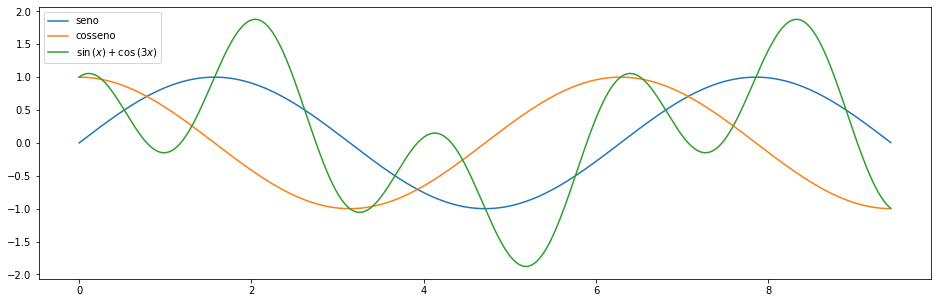

In [62]:
plt.figure(figsize=(16, 5))

plt.plot(x, y1, label='seno')
plt.plot(x, y2, label='cosseno')
plt.plot(x, y3, label='$\sin{(x)} + \cos{(3x)}$')
plt.legend()

### 2.5. Plotagem em diferentes `axes` e mesmo `figure`

#### 2.5.1. Utilizado o `subplot` (API funcional)

```python
plt.subplot(número_linhas, número_colunas, posição)
```

Vamos plotar os mesmos $y_1$, $y_2$ e $y_3$:

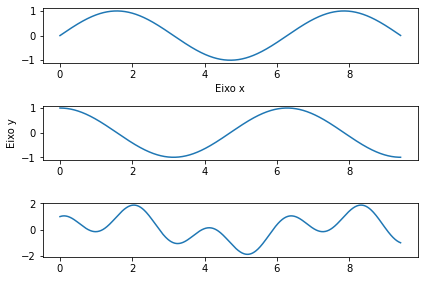

In [75]:
# plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1) # Indo para a primeira posição (axes) da figura
plt.plot(x, y1)
plt.xlabel('Eixo x')

plt.subplot(3, 1, 2) # Indo para a segunda posição (axes) da figura
plt.plot(x, y2)
plt.ylabel('Eixo y')

plt.subplot(3, 1, 3) # Indo para a terceira posição (axes) da figura
plt.plot(x, y3)

plt.tight_layout()

Agora, vamos plotar os mesmos $y_1$, $y_2$, $y_3$ e, adicionalmente, um $y_4$, em que:

$$
y_4 = \cos{(x)} + \sin{(5x)}
$$

In [77]:
y4 = (y2 + (np.sin(5*x))) 

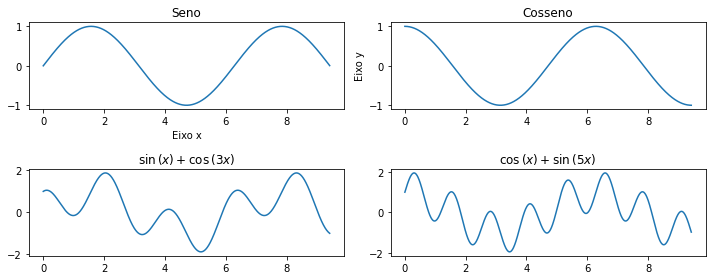

In [81]:
# Enviado por Giuliana

plt.figure(figsize=(10, 4))

plt.subplot(2,2,1)
plt.plot(x,y1)
plt.xlabel('Eixo x')
plt.title('Seno')

plt.subplot(2,2,2)
plt.plot(x,y2) 
plt.ylabel('Eixo y') 
plt.title('Cosseno') 

plt.subplot(2,2,3) 
plt.plot(x,y3) 
plt.title('$\sin{(x)} + \cos{(3x)}$')

plt.subplot(2,2,4) 
plt.plot(x,y4) 
plt.title('$\cos{(x)} + \sin{(5x)}$') 

plt.tight_layout()

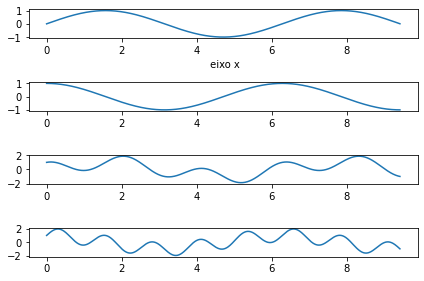

In [84]:
# Solução da Bruna

plt.subplot(4,1,1)
plt.plot(x,y1) 
plt.xlabel (' eixo x') 

plt.subplot(4,1,2) 
plt.plot(x,y2) 

plt.subplot(4,1,3) 
plt.plot(x,y3) 

plt.subplot(4,1,4) 
plt.plot(x,y4) 

plt.tight_layout() 

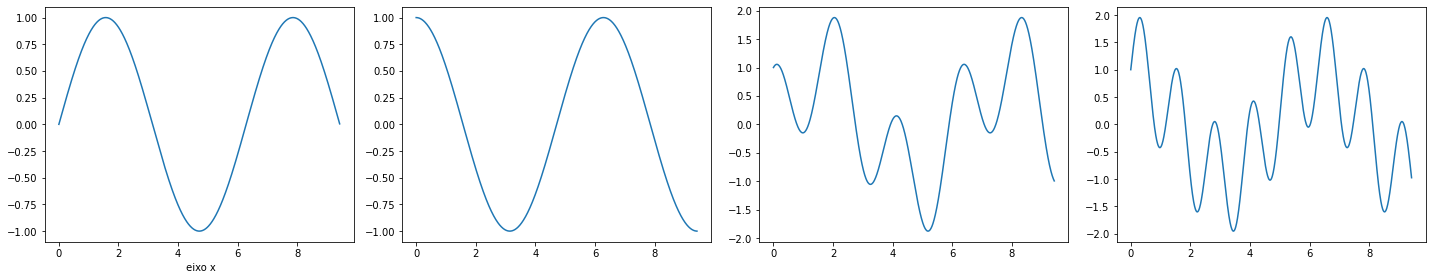

In [86]:
# Solução da Bruna

plt.figure(figsize=(20, 4))

plt.subplot(1,4,1)
plt.plot(x,y1) 
plt.xlabel (' eixo x') 

plt.subplot(1,4,2) 
plt.plot(x,y2) 

plt.subplot(1,4,3) 
plt.plot(x,y3) 

plt.subplot(1,4,4) 
plt.plot(x,y4) 

plt.tight_layout()

#### 2.5.2. Utilizando o `subplots` (API orientada a objetos)

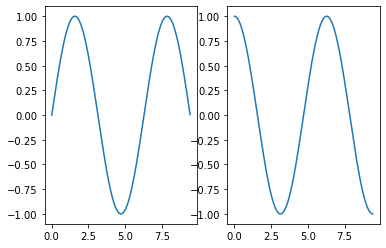

In [92]:
figure, axes = plt.subplots(1, 2)

axes[0].plot(x, y1)
axes[1].plot(x, y2)

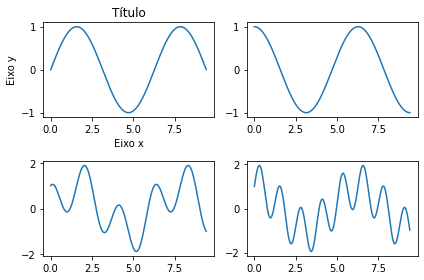

In [98]:
figure, axes = plt.subplots(2, 2)

axes[0, 0].plot(x, y1)
axes[0, 0].set_xlabel('Eixo x')
axes[0, 0].set_ylabel('Eixo y')
axes[0, 0].set_title('Título')

axes[0, 1].plot(x, y2)

axes[1, 0].plot(x, y3)

axes[1, 1].plot(x, y4)

plt.tight_layout()

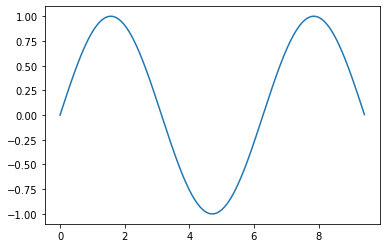

In [103]:
plt.plot(x, y1)

```python
figure.add_axes([posicao_x_inicial, posicao_y_inicial, distancia_x, distancia_y])
```

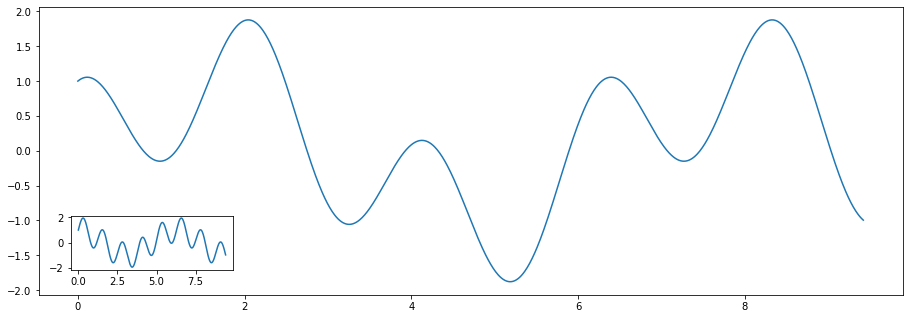

In [111]:
figure = plt.figure(figsize=(15, 5)) # Cria uma figure

axes1 = figure.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = figure.add_axes([0.13, 0.17, 0.15, 0.15])

axes1.plot(x, y3)
axes2.plot(x, y4)

### Exercícios

1. Crie um array x, começando de 1 até 5, com passo um passo de 0.01 entre os elementos. Depois calcule as seguintes funções sobre esse array:

$$y_1 = \frac{\sin(x)}{x}$$  
$$y_2 = \frac{2^x}{20}$$

Por fim, plot essas duas funções, em função do x, ambas em uma mesma figura e em um mesmo axes. Adicione um label para cada curva e, seguida, adicione uma legenda no gráfico para identificar cada curva.

2. Utilizando os mesmos dados utilizados na questão anterior, plote as duas curvas (funções) em uma mesma figura, porém, em dois axes distintos (um abaixo do outro).

## 3. Estilização dos Gráficos
---

- `color`
- `linewidth`
- `linestyle`
- `marker`
- `fontsize`
- `fontfamily`
- `fontweight`
- Utilização de LaTeX
- `alpha`
- ...

### Temas

[Documentação](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html)

In [ ]:
plt.style.use('seaborn')

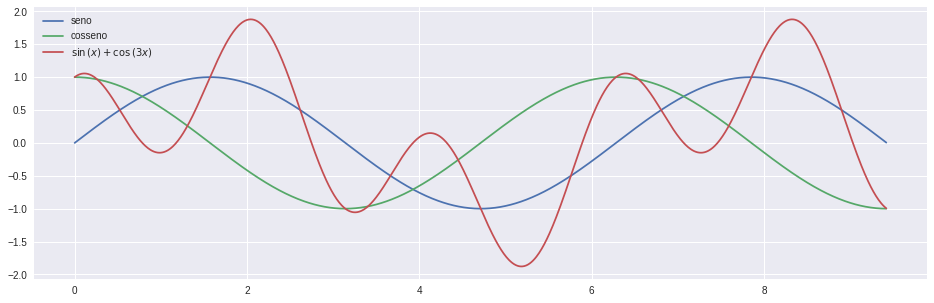

In [116]:
plt.figure(figsize=(16, 5))

plt.plot(x, y1, label='seno')
plt.plot(x, y2, label='cosseno')
plt.plot(x, y3, label='$\sin{(x)} + \cos{(3x)}$')
plt.legend()